# ESS330 Project Intro & Methods

Caleb Cripe (Colorado State University)  
Caitlin Rasbid (Colorado State University)

## Background

The issue of climate change has caused regime alterations across aspects of ecosystems, impacting ecosystems functioning and environmental services we utilize. Especially in the Western US, we rely on snowpack that accumulates during the winter to provide water for the drier months of the year, which means that decreased snowpack results in scarcity. Globally, snowpack substantially contributes to the livelihoods of over a billion people, who are both directly and indirectly dependent on meltwater resources. (@irannezhad2022snowpack) Decreased annual snowpack can have adverse impacts on fire conditions, making wildfires that start more dangerous and difficult to control. Reduced meltwater, soil moisture, and fuel moisture can greatly increase fire potential in forest systems, which we have already begun to see across the West. (@Gergel2017-vr) These factors increase the need for snowpack monitoring so urban populations are able to recognize when droughts are likely to occur and when fire risk is higher than average.

## Data

The Snow Telemetry Network, or SNOTEL, We will utilize SNOTEL data from the six sites located in Rocky Mountain National Park, pulling data on average snow water equivalent recorded, average snow depth, average snow temperature, (soil temperature observed?) and mean air temperature. The six sites we plan to analyze located within RMNP are Phantom Valley, Lake Irene, Willow Park, Bear Lake, Copeland Lake, and Wild Basin. Using the SNOTEL data, we can extract daily records for each of the variables at each of the six sites in RMNP over a 25 year period, allowing us to observe changes from the first quarter of the 21st century.

## Methods

Before conducting statistical tests, we plan to model these variables visually through graphs which will help us draw initial conclusions on overall trends in the data. We plan to utilize multiple linear regression modeling to see if there is a relationship or impact on annual snowpack with the variables we want to analyze. Multiple linear regression modeling would allow us to compare multiple independent variables for their impact on our dependent variable (annual snowpack), highlighting which variables are statistically significant. as well as ANOVA testing to visualize variance between the variables that contribute to snowpack.

## Exploring Our Data

In [ ]:
library(readr)
install.packages("janitor", repos = "https://cloud.r-project.org")


The downloaded binary packages are in
    /var/folders/jn/hk4fnzlx679cs3m0_lnzh7hh0000gn/T//Rtmpvk5I2U/downloaded_packages


Attaching package: 'janitor'

The following objects are masked from 'package:stats':

    chisq.test, fisher.test

Rows: 9133 Columns: 37

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Date
dbl (36): Bear Lake (322) Snow Water Equivalent (in) Start of Day Values, Be...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ purrr     1.0.2
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

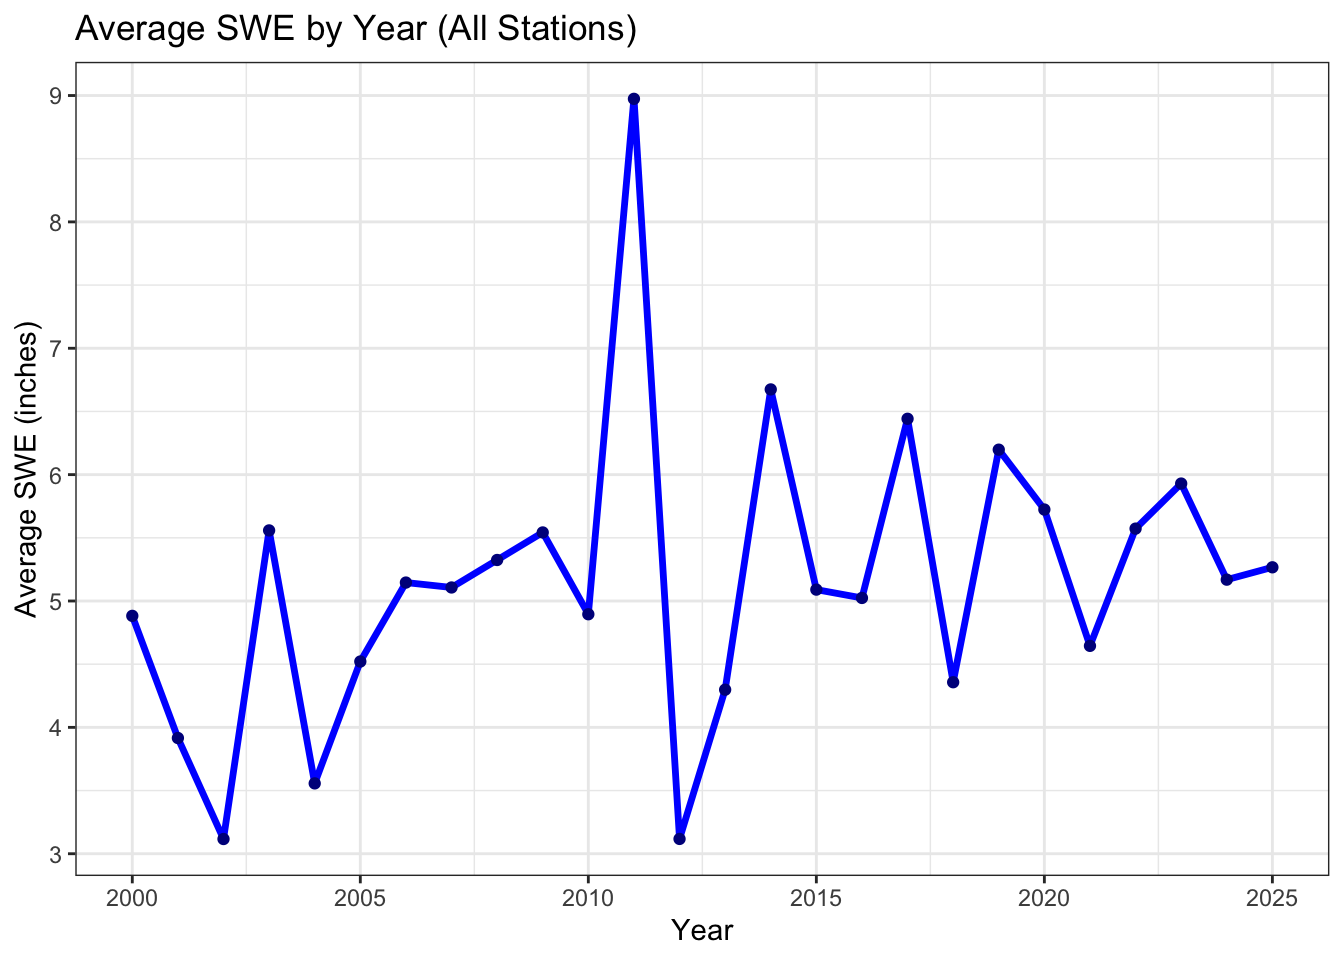

In [ ]:
library(tidyverse)

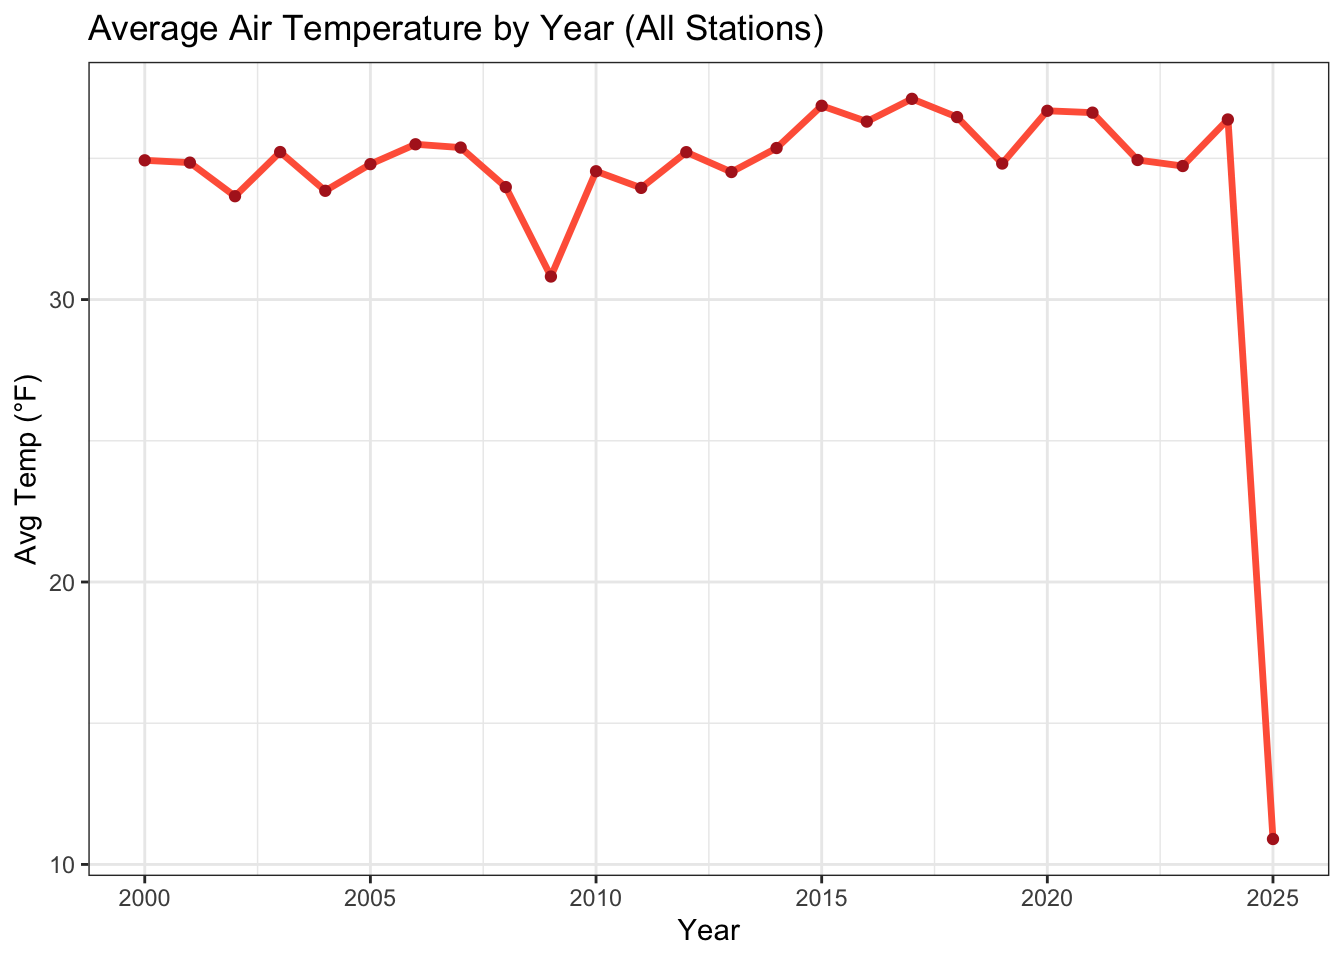

In [ ]:
temp_data <- df %>%
  select(year, contains("air_temperature_average")) %>%
  pivot_longer(
    cols = -year,
    names_to = "station",
    values_to = "temp"
  ) %>%
  mutate(temp = as.numeric(temp))

annual_temp <- temp_data %>%
  group_by(year) %>%
  summarise(avg_temp = mean(temp, na.rm = TRUE))

ggplot(annual_temp, aes(x = year, y = avg_temp)) +
  geom_line(color = "tomato", linewidth = 1.2) +
  geom_point(color = "firebrick") +
  labs(title = "Average Air Temperature by Year (All Stations)",
       x = "Year", y = "Avg Temp (°F)") +
  theme_bw()

## Preliminary Methods

To begin, we will conduct an exploratory data analysis using visual elements such as ggplots to represent trends in SWE over time and descriptive methods such as ANOVA to determine the differences in SWE by site. Visual exploration is important to understand if the nature of the relationship between variables is linear or if some transformation would better represent the relationship. After our visual exploration, we will perform any transformations necessary prior to model creation. If there appears to be a significant difference in SWE based on site, we may need to introduce site-specific variables such as elevation and latitude that will capture some individual site characteristics.

We can use other summary statistics such as cor() to assess any underlying correlations between variables that will influence model design and assess trends over time. Then we will use a simple linear regression with SWE as the predicted value and the five annual aggregate variables as predictors. This will allow us to get an idea of what variables are significant, if the relationship is positive or negative, and how well the model fits based on the R squared model. Likely the linear regression will not be a sufficient model, so we will use machine learning to create a workflow with additional model types, such as random forest or neural network. We could run into challenges in several ways, such as unexpected relationships between variables, missing data, or roadblocks associated with unfamiliarity with R and handling data. We expect to handle these challenges in different ways, but are preparing for them by reviewing past lecture material and re -familiarizing ourselves with commands that we need to use to achieve our goals.

These methods will provide us with helpful insights into our overall research question in several ways. First, visual exploration will show differences SWE over time and across sites, suggesting the impacts of climate change and which ecosystems seem to be most resistant to this change, if any. The ANOVA and summary statistics will serve a similar purpose. The linear and machine learning models we will build will be useful in understanding what impacts SWE to be able to predict future SWE levels based on environmental indicators.